# Primer parcial LSH - 1C - 27/05

Nota de corrección: La métrica correcta es Jaccard. Acá yo uso euclidea. El resto está bien. Solo hay que adaptarlo a la métrica correcta

1) La métrica euclidea es la indicada para este problema. Esto es porque
* Nos importa el orden de los valores de cada posición del vector. Además esto descarta el uso de Jaccard.
* Nos importa los valores absolutos de cada posición del vector. No es lo mismo [1,3] que [3,9]. También esto descarta al uso de Coseno


Ya habiendo elegido la métrica, es necesario mencionar como obtener los minhash. 

Esta se obtiene mediante la función mh(x) = floor((x*v+a)/w).

* Donde x es el vector con las notas musicales
* v es un vector aleatorio de la misma dimensión que x
* a es un parámetro entero entre 0 y w-1
* w es un hiperparámetro que depende de los datos.

El vector x se nos da, el vector v se puede generar simplemente consultando el largo de x, y luego generar un vector del mismo tamaño. El a puede ser 0.

En cambio w debe ser elegido según el diámetro, en este caso la distancia entre una nota y la otra. Por eso elijo w = 2.

Por suerte, el floor nos arroja valores mayores a 0 por lo que lo que resulta del minhash lo puedo utilizar para la tabla de hash

2) Organizando los valores dados tenemos que:
* d1 = 1-0.8 = 0.2
* d2 = 1-0.2 = 0.8
* p1 = 0.88
* p2 = 0.16

d1 y d2 se obtienen de la fórmula de la semejanza. 

p1 es por definición de probabilidad de colisión para objetos semejantes

p2 se obtiene de la tasa de falsos positivos. En este caso 160/1000=0.16

Probando valores, podemos obtener que con r=2 min hashes y b=3 buckets tengo p1'=0.953 y p2'=0.115. Lo cual mejora la precisión y reduce los falsos positivos

4) Empiezo con un vector, por ejemplo x = [1,2,3,7] de 4 notas musicales. Si el esquema es r=2 y b=3 entonces tendré que utilizar 6 funciones de minhash descritas en 1)

Entonces obtendré 6 minhashes, los cuales utilizaré para indexar una función de hashing. Por ejemplo:

mh1(x) = floor([1,2,3,7].[1,3,7,6]/2)=35 , mh2(x) = floor([1,2,3,7].[2,3,3,4]/2)=22

Luego utilizo estos 2 valores para mi función de hashing por ejemplo: h(mh1,mh2) = 1 mh1 + 2 mh2 %p%m.

Donde p es un número primo mayor a m. Ya que cuento con más de 70M de canciones, necesitaré una tabla lo suficientemente grande para que pueda almacenar un identificador de las mismas. Entonces necesitaré que m sea mayor que 70M * 3 * 2 = 420M de posiciones en la tabla, siendo el 3 los buckets y 2 el factor de carga

Al ser números tan grandes, podemos suponer que la función de hashing de la tabla me dice que para la primer tabla (b=1) busque en la posición 3, para la segunda en la posición 7 y para la tercera en la posición 1. En este caso, como es una consulta, recogeremos los candidatos de cada bucket de la tabla de hash. Por ejemplo, A y B. Estos candidatos pueden ser falsos positivos, por lo que tendremos que aplicar la función de semejanza para ver si efectivamente son similares y quedarnos con el de mayor similaridad

3) La diferencia con respecto a una consulta radica en el proceso final. Una vez obtenido los índices por la función de hashing, almacenaremos en esos buckets las referencias a las canciones.
Por lo que cuando hagamos una query, el dato de la canción estará, gracias a que b>1, en varias posiciones de la tabla.
Notar también que la amplificación de la familia lsh, el mejoramiento de la precisión (AND) está implicito en la función de minhash como índice.

Un dato no menor es que tendremos que tener en consideración que necesitaremos otra base de datos, con los identificadores y sus melodias.

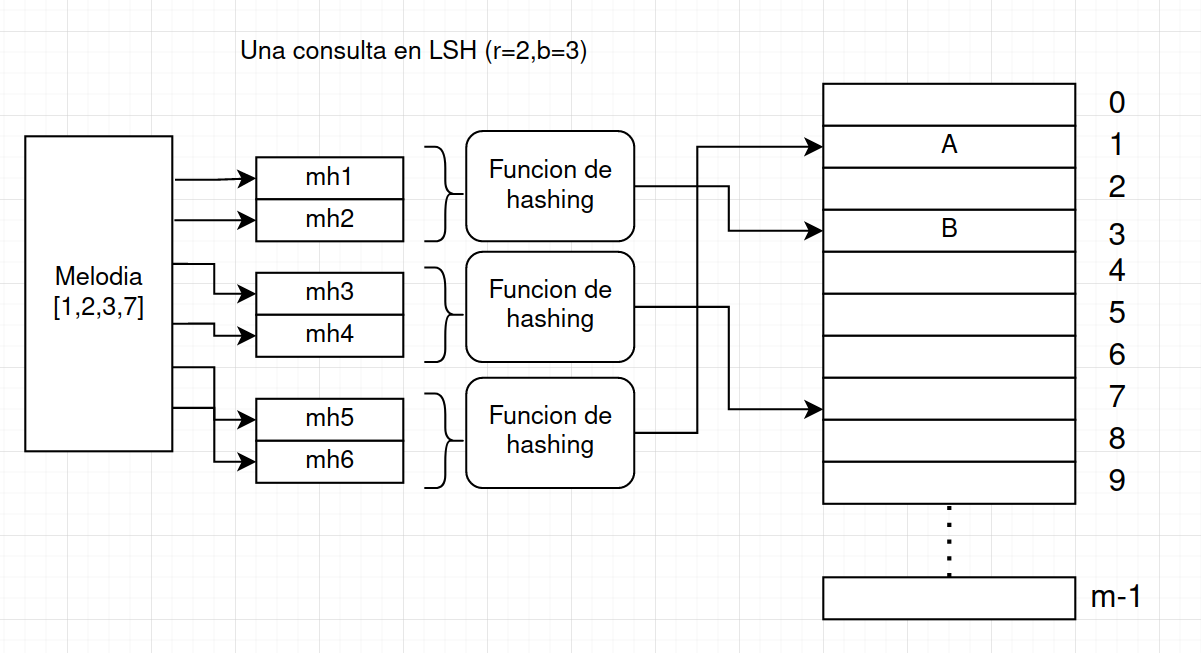